#### BF（Brute Force） 暴力匹配算法

  
在字符串A（长度n）中查找字符串B（长度m，n>m）
* 主串：A
* 模式串：B

* 时间复杂度：O(n*m)
  
比较常用的字符串匹配算法：
1. 实际场景下，主串和模式串不会太长，每次模式串与主串中的子串匹配的时候，当中途遇到不能匹配的字符的时候，就可以就停止了，不需要把 m 个字符都比对一下。所以，尽管理论上的最坏情况时间复杂度是 O(n*m)，但是，统计意义上，大部分情况下，算法执行效率要比这个高很多。
2. 算法思想简单，代码实现也简单，不容易出错 KISS(keep is simple and stupid)


在主串中，检查起始位置分别是 0、1、2....n-m 且长度为 m 的 n-m+1 个子串，看有没有跟模式串匹配的
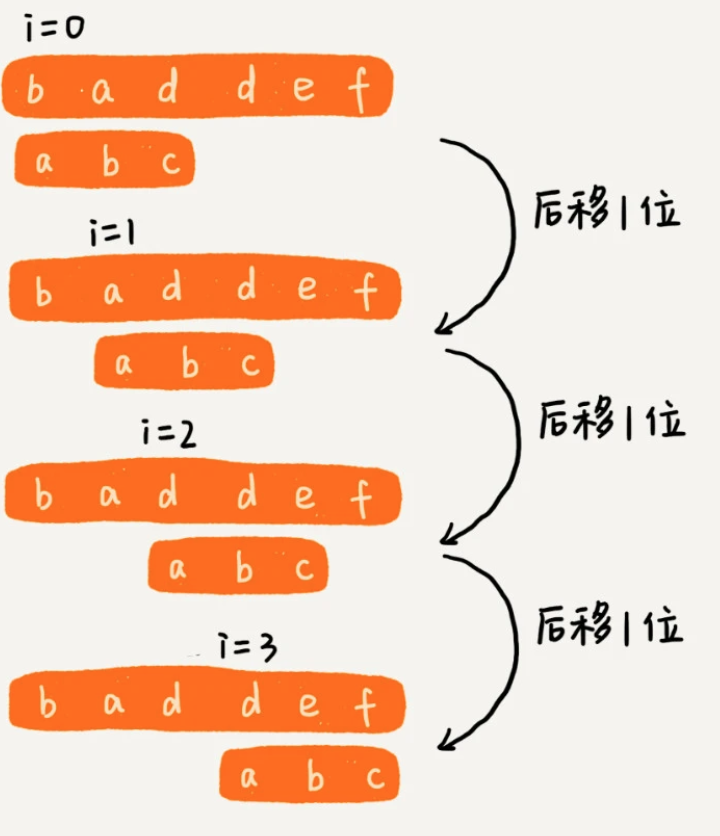


#### RK(Rabin-Karp) 算法

算法思路：
* 对主串种的n-m+1个子串分别求哈希值，然后逐个与模式串的哈希值比较大小
* 解决哈希冲突：哈希值相同时，再比较对应的子串和模式串是否一致

* 时间复杂度：O(n)

* 高效计算的哈希算法（举例）：
  * 假设字符串中只包含a~z这26个小写字符，用二十六进制来表示一个字符串，对应的哈希值就是二十六进制转换成十进制的结果
  * 规律：相邻子串s[i-1] 和 s[i] (i为子串在主串的起始位置)，对应的哈希值计算公式有交集
  * 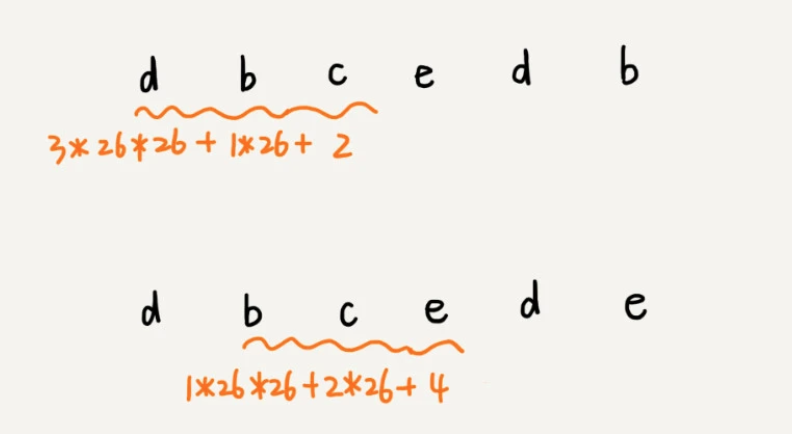
  * 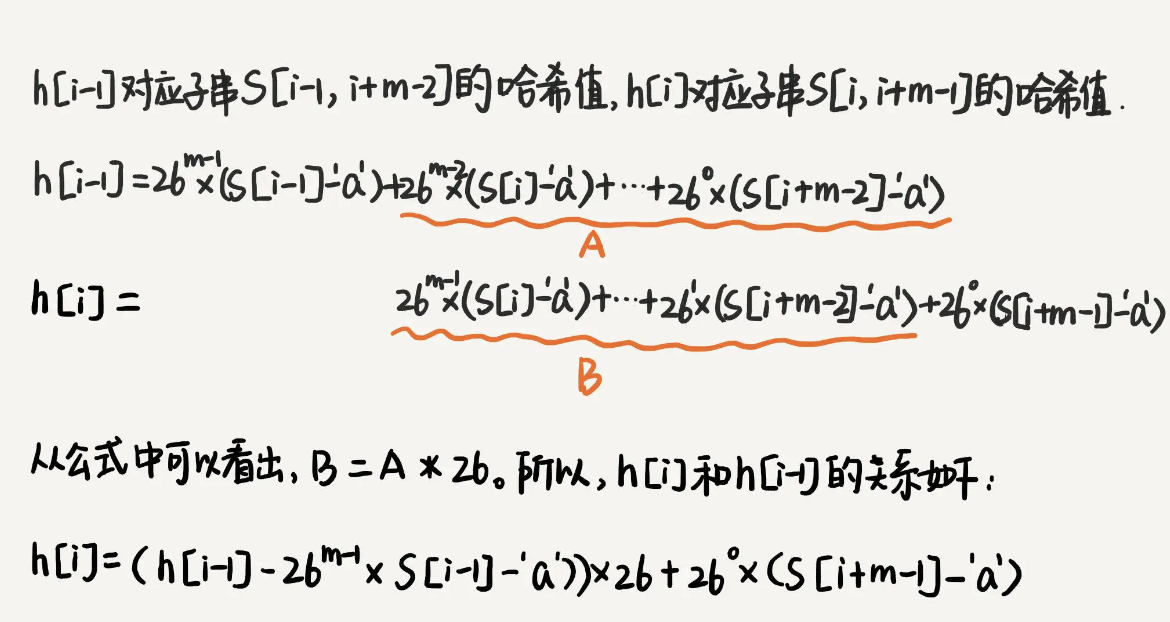


#### BM（Boyer-Moore） 算法

##### 坏字符规则（bad character rule）

时间复杂度：O(n/m)

* 在BF和RK中，都是按模式串的下标从小到大的顺序，依次与主串中的字符串进行匹配；在BM中，是按模式串下标从大到小的顺序到这匹配
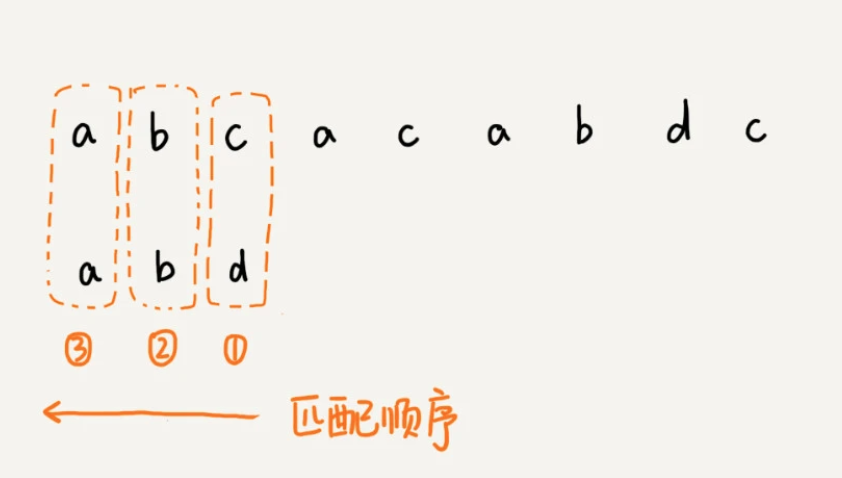

* 在发现否个字符没法匹配的时候，把这个没有匹配的字符叫做 *坏字符（主串中的字符）* -> c
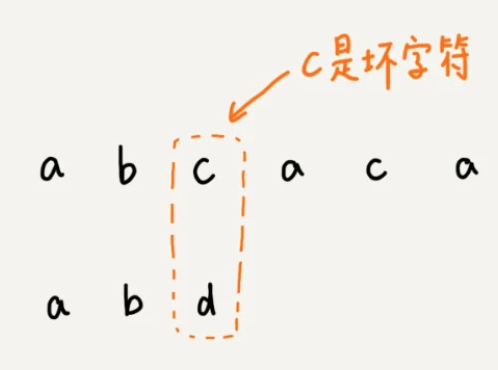

* 拿换字符c在 *模式串* 中查找，发现模式串中并不存在这个字符，即字符c与模式串中的任何字符都不可能匹配 -> 将模式串直接往后滑动三位，将模式串滑动到c后面的位置，再从模式串的末尾字符开始比较
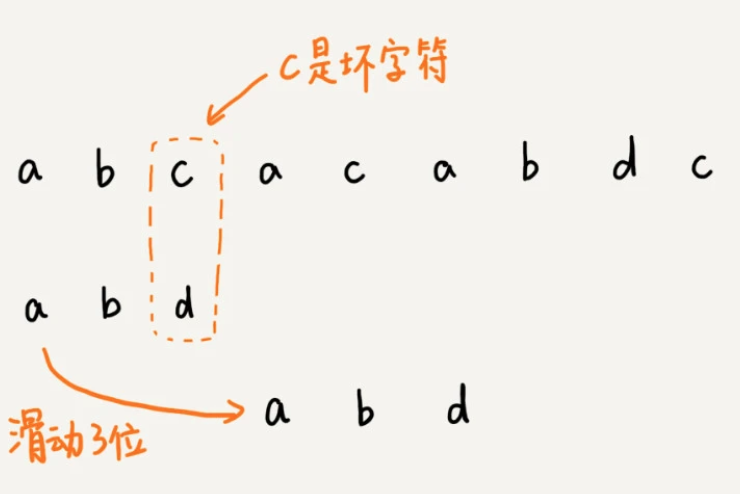

* 坏字符 -> a 在模式串中存在，模式串种下标为0的位置也是字符a，这种情况下，可以将模式串往后滑动两位，让两个a上下对齐，再从模式串的末尾字符开始，重新匹配
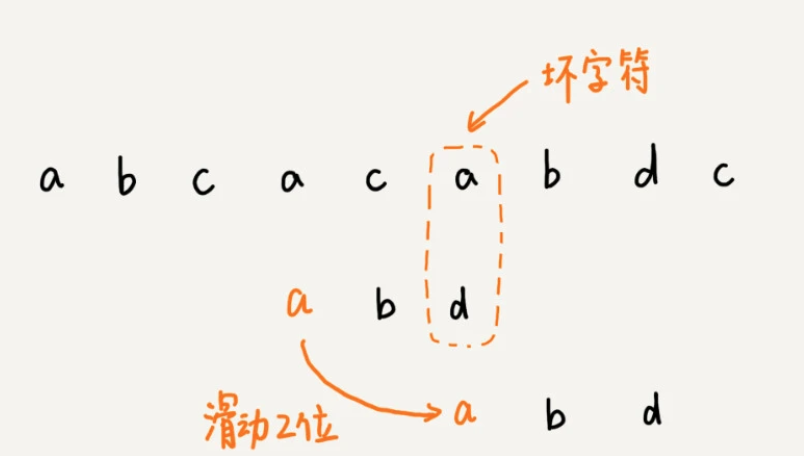


滑动规律总结：
1. 当发生不匹配的时候，我们把坏字符对应的模式串中的字符下标记作 si。如果坏字符在模式串中存在，我们把这个坏字符在模式串中的下标记作 xi。如果不存在，我们把 xi 记作 -1。那模式串往后移动的位数就等于 si-xi。（注意，我这里说的下标，都是字符在模式串的下标）
   1. 如果坏字符在模式串里多处出现，那我们在计算 xi 的时候，选择最靠后的那个，因为这样不会让模式串滑动过多，导致本来可能匹配的情况被滑动略过。
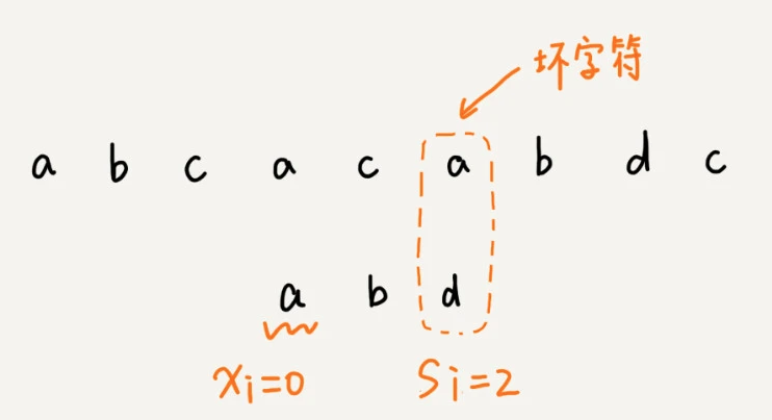



单纯使用坏字符规则还是不够的。因为根据 si-xi 计算出来的移动位数，有可能是负数，比如主串是 aaaaaaaaaaaaaaaa，模式串是 baaa。不但不会向后滑动模式串，还有可能倒退。所以，BM 算法还需要用到“好后缀规则”

##### 好后缀规则（good suffix shift）

* 把已经匹配的 bc 叫作好后缀，记作{u}。我们拿它在模式串中查找，如果找到了另一个跟{u}相匹配的子串{u*}，那我们就将模式串滑动到子串{u*}与主串中{u}对齐的位置。
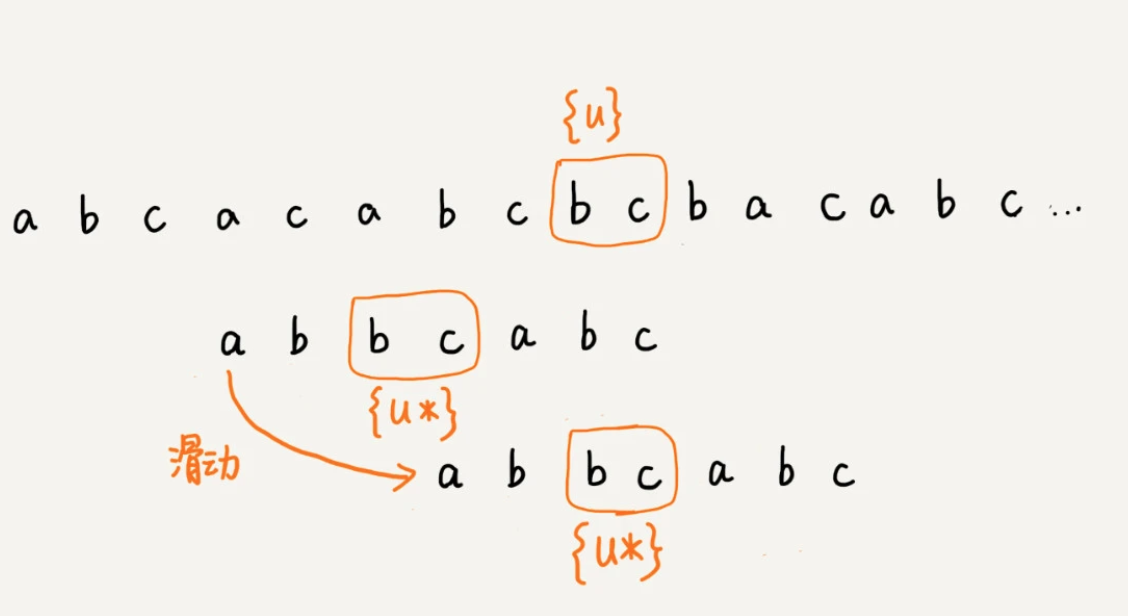

* 如果在模式串中找不到另一个等于{u}的子串，我们就直接将模式串，滑动到主串中{u}的后面，因为之前的任何一次往后滑动，都没有匹配主串中{u}的情况
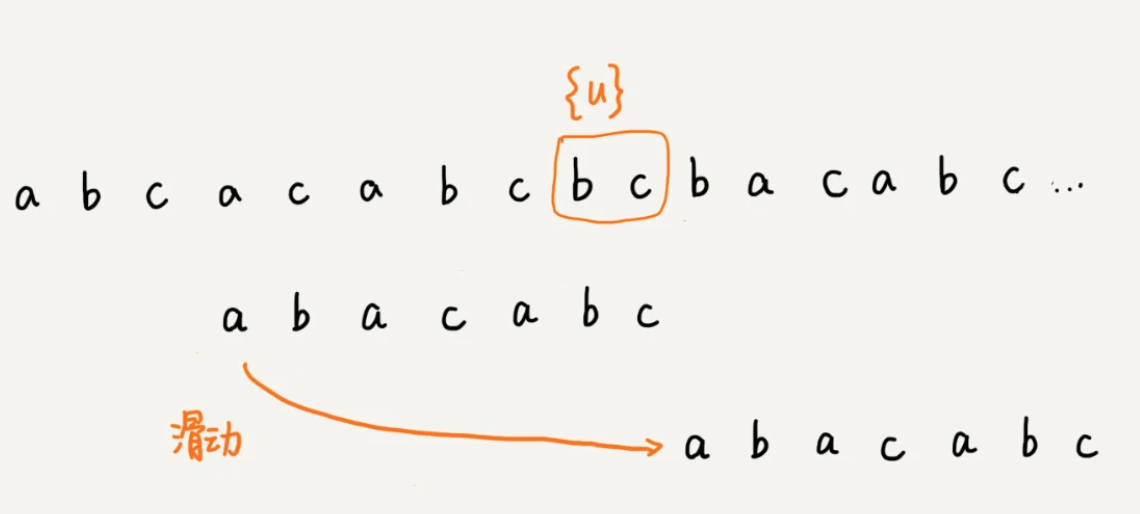

* 当模式串中不存在等于{u}的子串时，我们直接将模式串滑动到主串{u}的后面。这样做是否有点太过头呢？我们来看下面这个例子。这里面 bc 是好后缀，尽管在模式串中没有另外一个相匹配的子串{u*}，但是如果我们将模式串移动到好后缀的后面，如图所示，那就会错过模式串和主串可以匹配的情况。
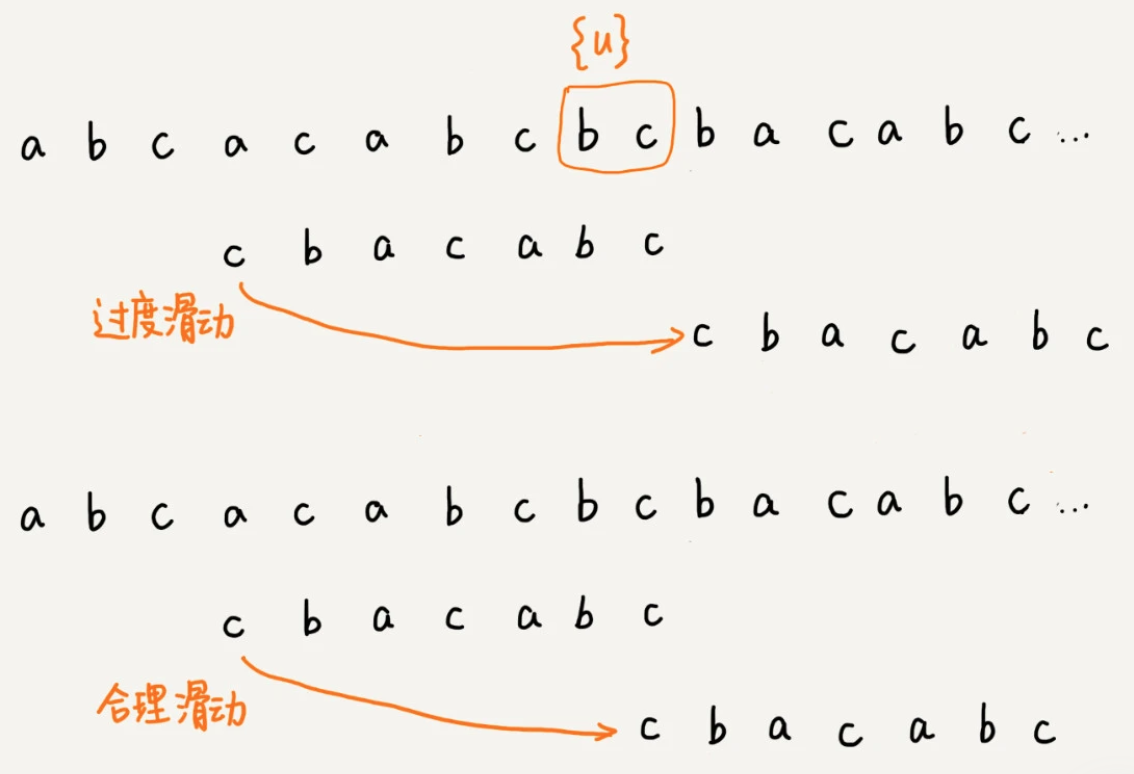


* 如果好后缀在模式串中不存在可匹配的子串，那在我们一步一步往后滑动模式串的过程中，只要主串中的{u}与模式串有重合，那肯定就无法完全匹配。但是当模式串滑动到前缀与主串中{u}的后缀有部分重合的时候，并且重合的部分相等的时候，就有可能会存在完全匹配的情况。

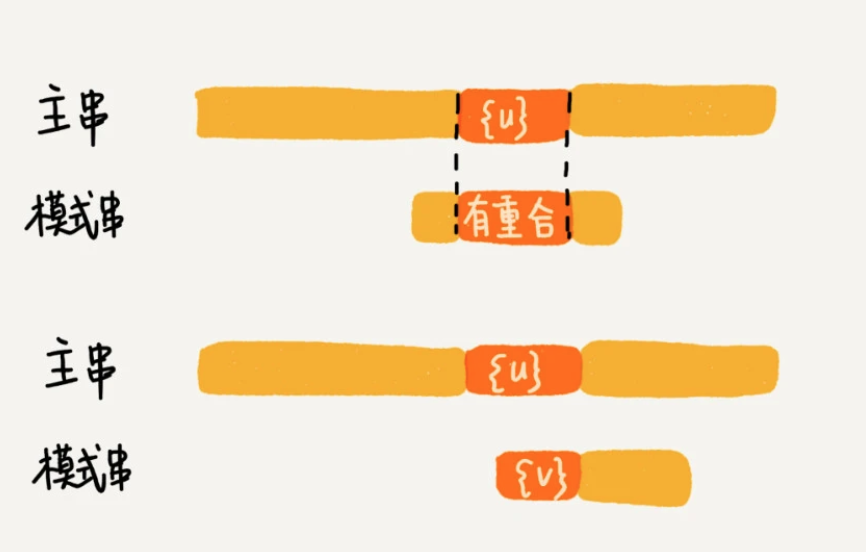

// TODO https://time.geekbang.org/column/article/71525?utm_campaign=geektime_search&utm_content=geektime_search&utm_medium=geektime_search&utm_source=geektime_search&utm_term=geektime_search


#### KMP

https://time.geekbang.org/column/article/71845?utm_campaign=geektime_search&utm_content=geektime_search&utm_medium=geektime_search&utm_source=geektime_search&utm_term=geektime_search